In [1]:
# !pip install tensorflow

In [2]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
	target_size=(128,128)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_data(img_path, number_of_data=2254):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = Image.open(file).resize((128, 128))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "dataset" #폴더명
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2254 입니다.
x_train shape: (2254, 128, 128, 3)
y_train shape: (2254,)


In [19]:
# for i in range(100):
#     plt.imshow(x_train[i])
#     print('라벨 : ', y_train[i])
#     plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

model.summary()

c:\Users\zqrc0\anaconda3\envs\motionpy310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,900 (28.21 MB)

 Trainable params: 7,394,900 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6002 - loss: 1.2754
Epoch 2/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9854 - loss: 0.0504
Epoch 3/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9976 - loss: 0.0108


In [29]:
image_dir_path = "dataset/test"
(x_test, y_test)=load_data(image_dir_path,328)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape : (328, 128, 128, 3)
y_test shape : (328,)


In [30]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

11/11 - 0s - 22ms/step - accuracy: 0.3537 - loss: 2.8992
test_loss : 2.8991854190826416
test_accuracy : 0.353658527135849


In [31]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model.predict() 결과 :  [1.46022514e-02 9.74546075e-01 1.08517092e-02 4.72182926e-12
 6.19702423e-09 1.30536363e-11 1.83335586e-11 5.14762157e-11
 1.72774434e-10 4.29174491e-12 5.66621139e-10 1.55812058e-10
 3.11162589e-11 1.41767795e-11 3.37360945e-10 1.63160024e-11
 4.50620918e-09 6.58061294e-09 1.10194492e-11 1.92311861e-11]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


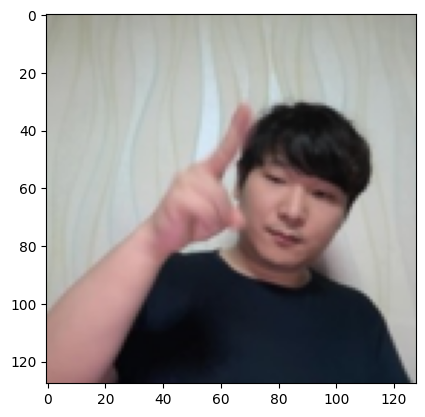

In [32]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.2254391e-02 9.6007848e-01 1.7667066e-02 5.3499353e-12 5.4652203e-09
 1.4822954e-11 2.2680859e-11 5.7384843e-11 1.6906605e-10 4.2432364e-12
 6.3583144e-10 1.8243859e-10 4.4399599e-11 1.9740268e-11 4.1487661e-10
 1.7391710e-11 4.8723869e-09 7.1868014e-09 1.1810700e-11 2.2236105e-11]
라벨: 0, 예측결과: 1
36


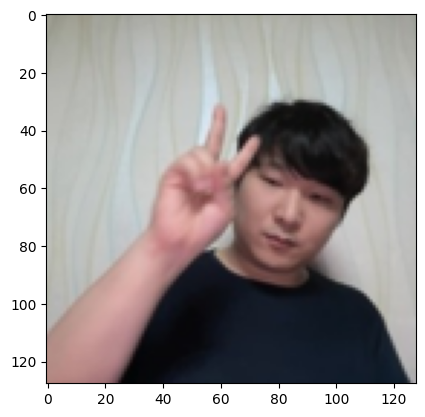

예측확률분포: [5.6344805e-05 9.9822193e-01 1.7217135e-03 9.7963900e-13 1.7093659e-09
 4.7177388e-13 5.4612234e-13 2.0505680e-11 1.5039721e-11 5.8991711e-13
 2.1472243e-10 4.1576013e-11 2.3106389e-12 1.3092378e-12 6.7246049e-11
 3.2058798e-13 2.7735256e-10 9.3318331e-10 1.9381523e-12 2.0148559e-12]
라벨: 0, 예측결과: 1
27


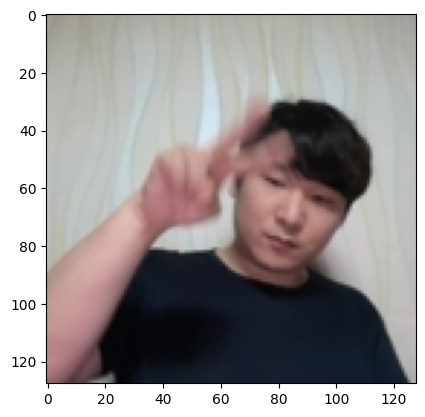

예측확률분포: [2.0140370e-04 9.8465836e-01 1.5140189e-02 7.3468271e-12 4.6680912e-09
 4.9566926e-12 4.8394062e-12 1.4015876e-10 5.9687970e-11 4.2829390e-12
 1.4497692e-09 2.4687416e-10 1.9802110e-11 1.1543288e-11 4.7124515e-10
 2.3352611e-12 1.2975484e-09 3.4835248e-09 1.4808679e-11 1.5675457e-11]
라벨: 2, 예측결과: 1
311


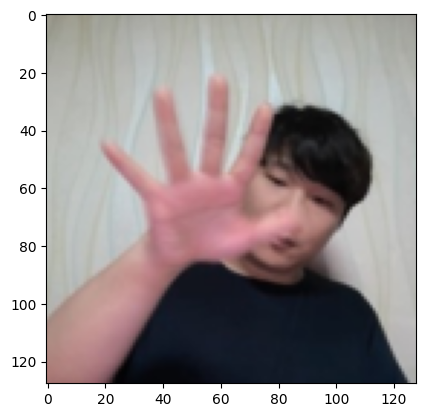

예측확률분포: [2.0474022e-02 9.4673407e-01 3.2791894e-02 7.4734594e-12 6.1226544e-09
 2.1528132e-11 2.8331082e-11 8.6464148e-11 1.8470979e-10 5.8295127e-12
 9.3447472e-10 2.2945278e-10 5.2864657e-11 2.6080757e-11 6.4655642e-10
 1.6605597e-11 5.2419513e-09 7.3978366e-09 1.3946850e-11 3.4091584e-11]
라벨: 2, 예측결과: 1
237


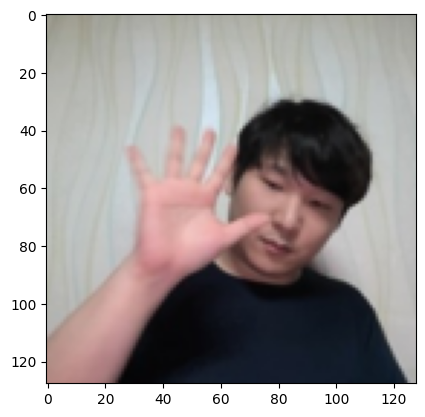

예측확률분포: [4.7647336e-01 5.1956856e-01 3.9580818e-03 4.4920257e-12 4.6650803e-09
 1.9494319e-11 7.6506627e-11 2.1821777e-11 2.8969774e-10 2.4200884e-12
 2.9433450e-10 1.4159894e-10 6.0227268e-11 1.9271869e-11 2.9893596e-10
 4.4300858e-11 1.2598985e-08 6.9464696e-09 5.8887309e-12 2.7960294e-11]
라벨: 2, 예측결과: 1
295


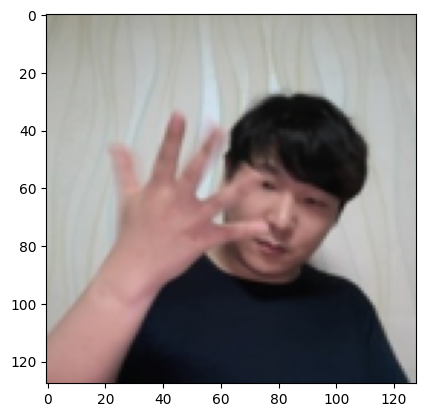

예측확률분포: [9.9883848e-01 1.0200371e-03 1.4146551e-04 6.3899027e-14 7.6369099e-11
 1.7462778e-12 8.4830172e-12 2.7688263e-13 1.8070391e-11 9.1014090e-14
 3.8752179e-12 1.5903436e-12 4.3564262e-12 1.1280861e-12 4.1856922e-12
 7.0356208e-12 9.1025043e-10 2.3073544e-10 1.2823495e-13 1.3683001e-12]
라벨: 2, 예측결과: 0
240


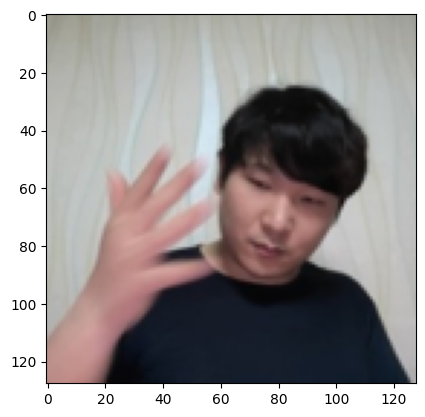

예측확률분포: [9.7204190e-01 2.6589671e-02 1.3683870e-03 9.7912553e-13 9.5478514e-10
 1.0845279e-11 4.5990801e-11 5.0203249e-12 1.2786155e-10 1.0000628e-12
 7.0078936e-11 2.6086978e-11 2.9822339e-11 9.5340671e-12 6.3714679e-11
 3.2591280e-11 5.4544596e-09 2.1306379e-09 1.6942119e-12 1.2648834e-11]
라벨: 2, 예측결과: 0
251


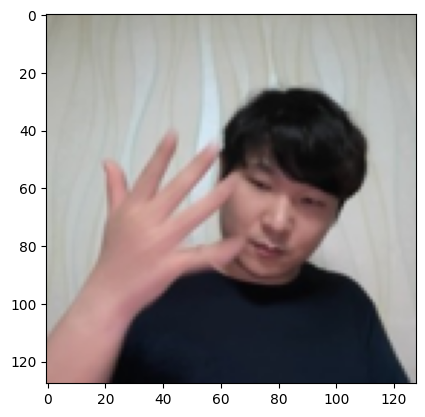

예측확률분포: [4.6778691e-04 5.1116568e-01 4.8836648e-01 3.1594046e-12 2.9666491e-09
 5.3362900e-12 2.5585836e-12 2.4008934e-10 6.7649032e-11 8.6925024e-12
 1.5709722e-09 1.0369475e-10 2.1848618e-11 1.5163421e-11 2.8250180e-10
 2.4824342e-12 9.3351360e-10 3.9036872e-09 1.3464137e-11 1.5931432e-11]
라벨: 0, 예측결과: 1
26


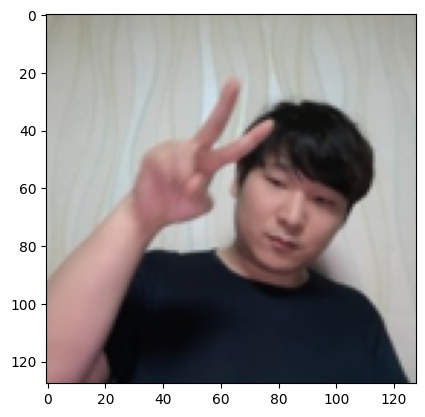

예측확률분포: [6.6011050e-03 9.6495670e-01 2.8442152e-02 8.9288698e-12 9.1575529e-09
 1.8265655e-11 2.3212484e-11 1.6323842e-10 2.1528698e-10 8.8027892e-12
 1.8313778e-09 2.5666902e-10 5.2489343e-11 3.2553103e-11 6.5567252e-10
 1.6919086e-11 4.3911270e-09 9.1451424e-09 2.2590763e-11 3.9991316e-11]
라벨: 0, 예측결과: 1
81


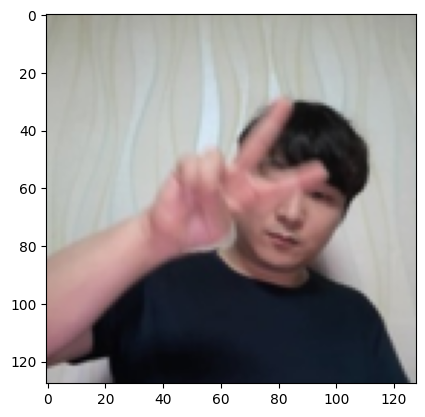

예측확률분포: [4.7647336e-01 5.1956856e-01 3.9580818e-03 4.4920257e-12 4.6650803e-09
 1.9494319e-11 7.6506627e-11 2.1821777e-11 2.8969774e-10 2.4200884e-12
 2.9433450e-10 1.4159894e-10 6.0227268e-11 1.9271869e-11 2.9893596e-10
 4.4300858e-11 1.2598985e-08 6.9464696e-09 5.8887309e-12 2.7960294e-11]
라벨: 2, 예측결과: 1
295


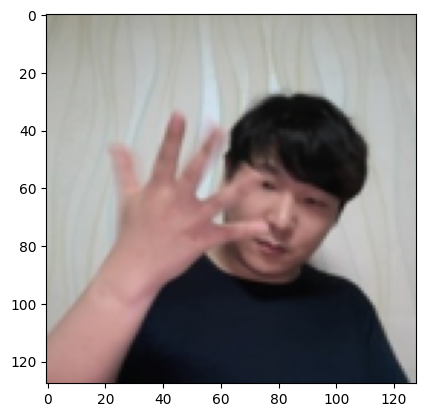

In [35]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    print(n)
    plt.show()